In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

In [66]:
df_autos = pd.read_csv('autos.csv')
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [26]:
df_autos.describe()#для просмотра некоторых основных статистических данных

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


#### Удаление столбцов с ценностью ниже 1000

In [27]:
df_autos.drop(df_autos[df_autos['price'] < 1000].index, axis=0, inplace=True)
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39


#### Удаление пустых столбцов и повторяющихся столбцов (вывод объема данных до и после удаления)

In [28]:
df_autos.info(), df_autos.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288193 entries, 1 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          288193 non-null  object
 1   name                 288193 non-null  object
 2   seller               288193 non-null  object
 3   offerType            288193 non-null  object
 4   price                288193 non-null  int64 
 5   abtest               288193 non-null  object
 6   vehicleType          267506 non-null  object
 7   yearOfRegistration   288193 non-null  int64 
 8   gearbox              277613 non-null  object
 9   powerPS              288193 non-null  int64 
 10  model                275991 non-null  object
 11  kilometer            288193 non-null  int64 
 12  monthOfRegistration  288193 non-null  int64 
 13  fuelType             270360 non-null  object
 14  brand                288193 non-null  object
 15  notRepairedDamage    245471 non-nu

(None,
 dateCrawled                0
 name                       0
 seller                     0
 offerType                  0
 price                      0
 abtest                     0
 vehicleType            20687
 yearOfRegistration         0
 gearbox                10580
 powerPS                    0
 model                  12202
 kilometer                  0
 monthOfRegistration        0
 fuelType               17833
 brand                      0
 notRepairedDamage      42722
 dateCreated                0
 nrOfPictures               0
 postalCode                 0
 lastSeen                   0
 dtype: int64)

In [29]:
df_autos.dropna(axis=0, inplace=True)
df_autos.drop_duplicates(keep='first', inplace=True)#drop_duplicates помогает удалить дубликаты из фрейма данных.
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17


In [30]:
df_autos.info(), df_autos.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219827 entries, 3 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          219827 non-null  object
 1   name                 219827 non-null  object
 2   seller               219827 non-null  object
 3   offerType            219827 non-null  object
 4   price                219827 non-null  int64 
 5   abtest               219827 non-null  object
 6   vehicleType          219827 non-null  object
 7   yearOfRegistration   219827 non-null  int64 
 8   gearbox              219827 non-null  object
 9   powerPS              219827 non-null  int64 
 10  model                219827 non-null  object
 11  kilometer            219827 non-null  int64 
 12  monthOfRegistration  219827 non-null  int64 
 13  fuelType             219827 non-null  object
 14  brand                219827 non-null  object
 15  notRepairedDamage    219827 non-nu

(None,
 dateCrawled            0
 name                   0
 seller                 0
 offerType              0
 price                  0
 abtest                 0
 vehicleType            0
 yearOfRegistration     0
 gearbox                0
 powerPS                0
 model                  0
 kilometer              0
 monthOfRegistration    0
 fuelType               0
 brand                  0
 notRepairedDamage      0
 dateCreated            0
 nrOfPictures           0
 postalCode             0
 lastSeen               0
 dtype: int64)

#### Удаление данных выходящих за границу таблицы (вывод данных до и после)

In [31]:
df_autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

<AxesSubplot:>

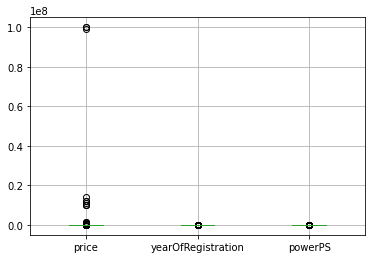

In [32]:
df_autos.boxplot(column=['price', 'yearOfRegistration', 'powerPS'])

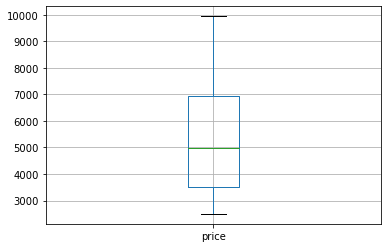

In [33]:
Q1 = df_autos['price'].quantile(0.25)
Q3 = df_autos['price'].quantile(0.75)

df_autos[(df_autos['price'] > Q1) & (df_autos['price'] < Q3)].boxplot(column=['price'])
df_autos = df_autos[(df_autos['price'] > Q1) & (df_autos['price'] < Q3)]

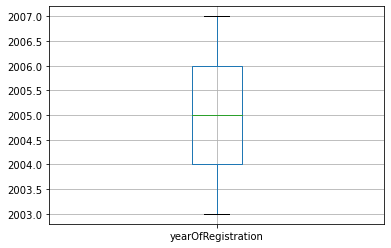

In [34]:
Q1 = df_autos['yearOfRegistration'].quantile(0.25)
Q3 = df_autos['yearOfRegistration'].quantile(0.75)

df_autos[(df_autos['yearOfRegistration'] > Q1) & (df_autos['yearOfRegistration'] < Q3)].boxplot(column=['yearOfRegistration'])
df_autos = df_autos[(df_autos['yearOfRegistration'] > Q1) & (df_autos['yearOfRegistration'] < Q3)]

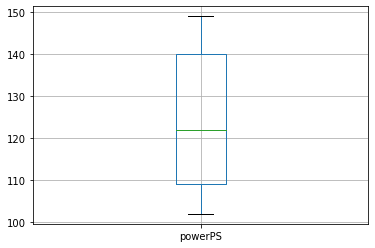

In [35]:
Q1 = df_autos['powerPS'].quantile(0.25)
Q3 = df_autos['powerPS'].quantile(0.75)

df_autos[(df_autos['powerPS'] > Q1) & (df_autos['powerPS'] < Q3)].boxplot(column=['powerPS'])
df_autos = df_autos[(df_autos['powerPS'] > Q1) & (df_autos['powerPS'] < Q3)]

In [36]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23167 entries, 11 to 371510
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          23167 non-null  object
 1   name                 23167 non-null  object
 2   seller               23167 non-null  object
 3   offerType            23167 non-null  object
 4   price                23167 non-null  int64 
 5   abtest               23167 non-null  object
 6   vehicleType          23167 non-null  object
 7   yearOfRegistration   23167 non-null  int64 
 8   gearbox              23167 non-null  object
 9   powerPS              23167 non-null  int64 
 10  model                23167 non-null  object
 11  kilometer            23167 non-null  int64 
 12  monthOfRegistration  23167 non-null  int64 
 13  fuelType             23167 non-null  object
 14  brand                23167 non-null  object
 15  notRepairedDamage    23167 non-null  object
 16  da

#### Гистограмма по маркам автомобилей, типу кузову и бензину

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

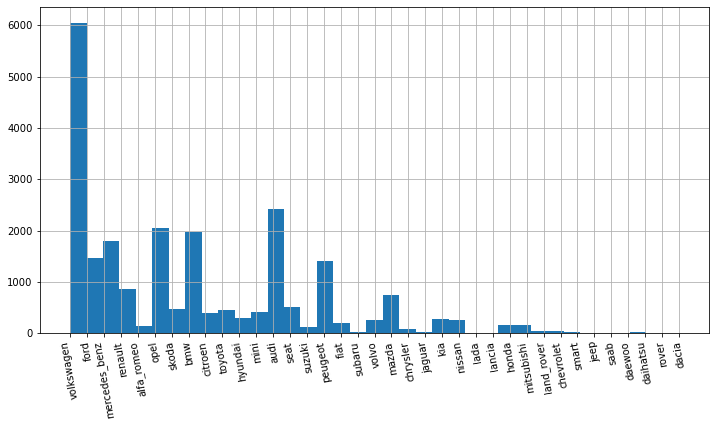

In [50]:
rcParams['figure.figsize'] = 12, 6
df_autos.brand.hist(bins=len(df_autos.brand.unique()))
plt.xticks(rotation=100)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

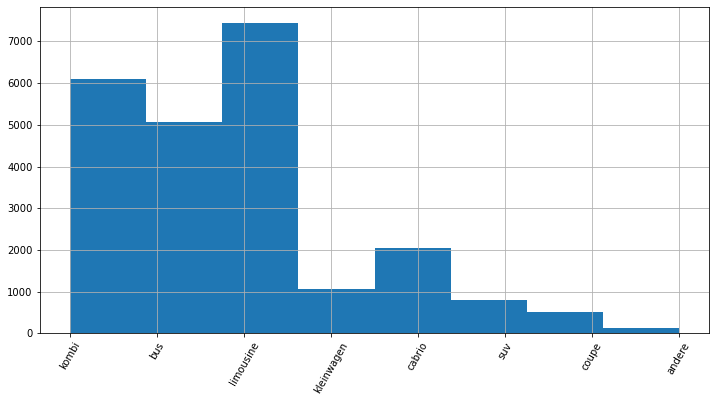

In [45]:
rcParams['figure.figsize'] = 12, 6
df_autos.vehicleType.hist(bins=len(df_autos.vehicleType.unique()))
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

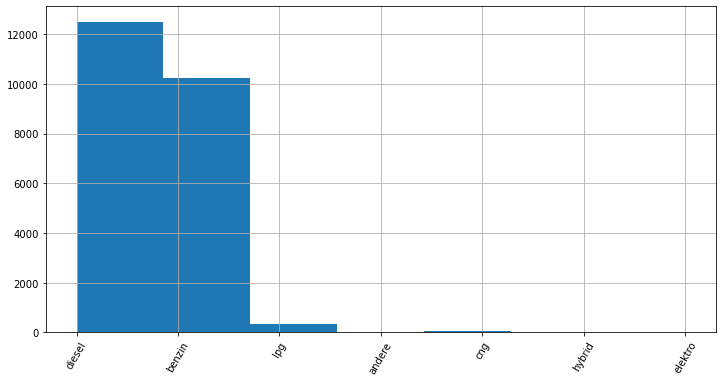

In [44]:
rcParams['figure.figsize'] = 12, 6
df_autos.fuelType.hist(bins=len(df_autos.fuelType.unique()))
plt.xticks(rotation=60)

#### Добавление длины названия

In [51]:
df_autos['name_length'] = df_autos['name'].apply(len)
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,name_len,name_length
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,140,...,12,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17,45,45
18,2016-03-23 15:48:05,Ford_C_MAX_2.0_TDCi_DPF_Titanium,privat,Angebot,7550,test,bus,2007,manuell,136,...,6,diesel,ford,nein,2016-03-23 00:00:00,0,88361,2016-04-05 18:45:11,32,32
34,2016-03-17 18:55:12,Mercedes_Benz_E_200_CDI_Automatik_Classic,privat,Angebot,3500,control,limousine,2004,automatik,122,...,11,diesel,mercedes_benz,nein,2016-03-17 00:00:00,0,67071,2016-03-30 15:46:10,41,41
64,2016-03-08 12:54:47,Volkswagen_Jetta_1.9_TDI_DSG_DPF_Sportline,privat,Angebot,7000,test,limousine,2006,automatik,105,...,10,diesel,volkswagen,nein,2016-03-08 00:00:00,0,6242,2016-03-11 17:16:18,42,42
75,2016-03-31 18:46:36,VW_Golf_V_Plus_TDI_1_8,privat,Angebot,6600,control,limousine,2006,manuell,105,...,10,diesel,volkswagen,nein,2016-03-31 00:00:00,0,41812,2016-03-31 18:46:36,22,22


#### Карта кореляций между признаками

In [58]:
df_autos = pd.get_dummies(df_autos, columns=['vehicleType'])
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,...,brand_volkswagen,brand_volvo,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,2005,manuell,140,passat,...,1,0,0,0,0,0,0,1,0,0
18,2016-03-23 15:48:05,Ford_C_MAX_2.0_TDCi_DPF_Titanium,privat,Angebot,7550,test,2007,manuell,136,c_max,...,0,0,0,1,0,0,0,0,0,0
34,2016-03-17 18:55:12,Mercedes_Benz_E_200_CDI_Automatik_Classic,privat,Angebot,3500,control,2004,automatik,122,e_klasse,...,0,0,0,0,0,0,0,0,1,0
64,2016-03-08 12:54:47,Volkswagen_Jetta_1.9_TDI_DSG_DPF_Sportline,privat,Angebot,7000,test,2006,automatik,105,jetta,...,1,0,0,0,0,0,0,0,1,0
75,2016-03-31 18:46:36,VW_Golf_V_Plus_TDI_1_8,privat,Angebot,6600,control,2006,manuell,105,golf,...,1,0,0,0,0,0,0,0,1,0


In [59]:
spearman_corr = df_autos.corr(method='spearman')
spearman_corr['price']['vehicleType_bus':'vehicleType_suv']

vehicleType_bus           0.032184
vehicleType_cabrio        0.019494
vehicleType_coupe        -0.023589
vehicleType_kleinwagen   -0.038249
vehicleType_kombi        -0.054286
vehicleType_limousine     0.015894
vehicleType_suv           0.055120
Name: price, dtype: float64

In [60]:
pearson_corr = df_autos.corr(method='pearson')
pearson_corr['price']['vehicleType_bus':'vehicleType_suv']

vehicleType_bus           0.028678
vehicleType_cabrio        0.027332
vehicleType_coupe        -0.024775
vehicleType_kleinwagen   -0.040386
vehicleType_kombi        -0.046958
vehicleType_limousine     0.009756
vehicleType_suv           0.051834
Name: price, dtype: float64

<AxesSubplot:ylabel='Density'>

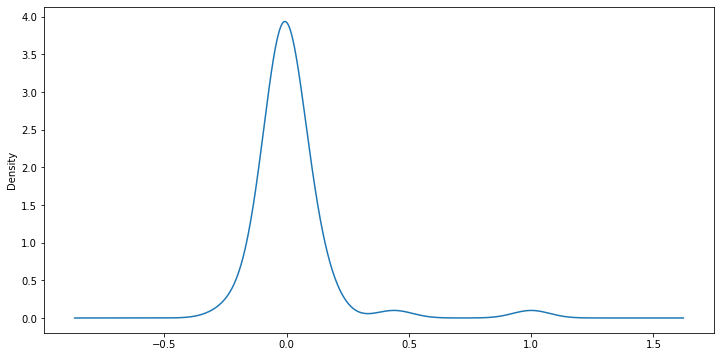

In [62]:
pearson_corr['price'].plot.kde()

<AxesSubplot:ylabel='Density'>

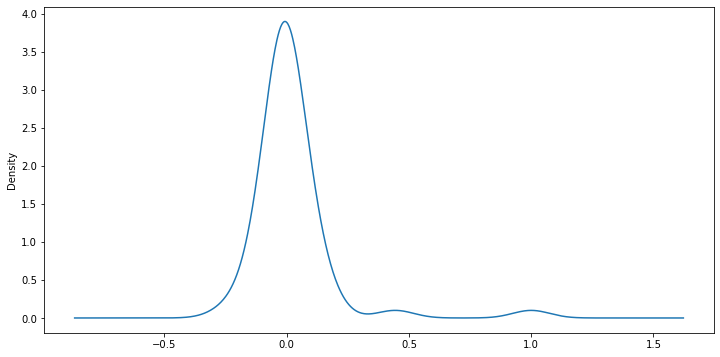

In [63]:
spearman_corr['price'].plot.kde()

In [64]:
df_autos['year+kilometer'] = df_autos['yearOfRegistration'] + df_autos['kilometer']
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,...,brand_volvo,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,year+kilometer
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,2005,manuell,140,passat,...,0,0,0,0,0,0,1,0,0,152005
18,2016-03-23 15:48:05,Ford_C_MAX_2.0_TDCi_DPF_Titanium,privat,Angebot,7550,test,2007,manuell,136,c_max,...,0,0,1,0,0,0,0,0,0,152007
34,2016-03-17 18:55:12,Mercedes_Benz_E_200_CDI_Automatik_Classic,privat,Angebot,3500,control,2004,automatik,122,e_klasse,...,0,0,0,0,0,0,0,1,0,152004
64,2016-03-08 12:54:47,Volkswagen_Jetta_1.9_TDI_DSG_DPF_Sportline,privat,Angebot,7000,test,2006,automatik,105,jetta,...,0,0,0,0,0,0,0,1,0,102006
75,2016-03-31 18:46:36,VW_Golf_V_Plus_TDI_1_8,privat,Angebot,6600,control,2006,manuell,105,golf,...,0,0,0,0,0,0,0,1,0,152006


In [65]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23167 entries, 11 to 371510
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   dateCrawled             23167 non-null  object
 1   name                    23167 non-null  object
 2   seller                  23167 non-null  object
 3   offerType               23167 non-null  object
 4   price                   23167 non-null  int64 
 5   abtest                  23167 non-null  object
 6   yearOfRegistration      23167 non-null  int64 
 7   gearbox                 23167 non-null  object
 8   powerPS                 23167 non-null  int64 
 9   model                   23167 non-null  object
 10  kilometer               23167 non-null  int64 
 11  monthOfRegistration     23167 non-null  int64 
 12  fuelType                23167 non-null  object
 13  notRepairedDamage       23167 non-null  object
 14  dateCreated             23167 non-null  object
 15  